# 14. This problem focuses on the collinearity problem.

In [560]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from ISLP.models import summarize

import matplotlib.pyplot as plt

## (a) Perform the following commands in Python

The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

In [561]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

In [562]:
# make a dataframe with intercept, x1, x2, and y columns
df = pd.DataFrame({'x1' : x1, 'x2': x2, 'y': y})
df.head()

,x1,x2,y
0,0.956002,0.469359,4.356977
1,0.207682,0.142509,3.677789
2,0.828445,0.587699,3.482079
3,0.149282,0.181141,2.369093
4,0.512805,0.236458,1.413295


In [563]:
df.shape

(100, 3)

Here is the form of linear model

Y = β0 + (β1 * X1) + (β2 * β2) + ε

β0 = 2

β1 = 2

β2 = 0.3

## (b) What is the correlation between x1 and x2? 

Create a scatterplot displaying the relationship between the variables.

In [564]:
df[['x1','x2']].corr()

,x1,x2
x1,1.000000,0.772324
x2,0.772324,1.000000


The correlation values between x1 and x2 is 0.77 suggesting highly correlated

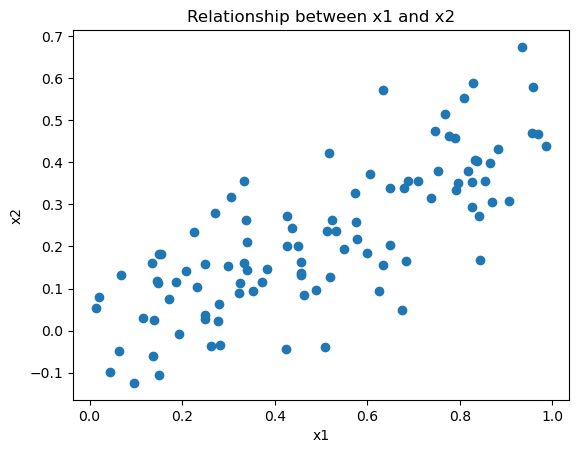

In [565]:
plt.scatter(df['x1'], df['x2'])
plt.xlabel('x1') 
plt.ylabel('x2')
plt.title('Relationship between x1 and x2')
plt.show()

Here is the evidence graph which shows x2 increase with the value increase for the x1 and vice versa, these are highly correlated to each other.

## (c) Using this data, fit a least squares regression to predict y using x1 and x2. 
Describe the results obtained. 

What are β0, β1, and β2? 

How do these relate to the true β0, β1, and β2? 

Can you reject the null hypothesis H0 : β1 = 0?

How about the null hypothesis H0 : β2 = 0?

In [566]:
# creating new column name intercept and initializing it with 1, because this is representing the intercept 
df['intercept'] = 1

In [567]:
# assign first two columns to X, and last to y
X = df[['intercept', 'x1', 'x2']]
y = df['y']

In [568]:
model = sm.OLS(y, X)

# fit the model
results = model.fit()

**What are β0, β1, and β2?**

In [569]:
# get the regression coefficients
coefficients = results.params

print("Intercept β0:", coefficients[0])
print("Coefficient for x1, β1:", coefficients[1])
print("Coefficient for x2, β2:", coefficients[2])

Intercept β0: 1.957909291136692
Coefficient for x1, β1: 1.6153676985271601
Coefficient for x2, β2: 0.9427766991595036


**How do these relate to the true β0, β1, and β2?**

The cofficient I obtained are nearly close to ture coefficient but not the same

**Can you reject the null hypothesis H0 : β1 = 0?**

In [570]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           5.76e-08
Time:                        17:13:18   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yes, we can reject the null hypothesis because, t value for x1 is 3.065, which is greater than 0 proving that x1 have significant statistical relationship with y and the p value is suggesting that the relationship is not by chance there is relationship. 

**How about the null hypothesis H0 : β2 = 0?**

We cannot reject the null hypothesis because, t value for x2 is 1.134, which is greater than 0 proving that x2 have some statistical relationship with y but looking at the p value against t, which is providing that the relationship is by chance, X2 does not have a significant statistical impact on y.

## (d) Now fit a least squares regression to predict y using only x1. 

Comment on your results. Can you reject the null hypothesis H0 :β1 =0?

In [571]:
# assign first two columns to X, and last to y
X = df[['intercept', 'x1']]
y = df['y']

In [572]:
model = sm.OLS(y, X)

# fit the model
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.37e-08
Time:                        17:13:18   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yes, we can reject the null hypothesis because, t value for x1 is 6.196, which is greater than 0 proving that x1 have significant statistical relationship with y and the p value is suggesting that the relationship is not by chance there is relationship.

## (e) Now fit a least squares regression to predict y using only x2. 

Comment on your results. Can you reject the null hypothesis H0 :β2 =0?

In [573]:
# assign first two columns to X, and last to y
X = df[['intercept', 'x2']]
y = df['y']

In [574]:
model = sm.OLS(y, X)

# fit the model
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           7.43e-07
Time:                        17:13:18   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yes, we can reject the null hypothesis because, t value for x2 is 5.291, which is greater than 0 proving that x2 have significant statistical relationship with y and the p value is suggesting that the relationship is not by chance there is relationship. 

## (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

When training model with both x1 and x2, in the presence of x2 the standard error for β1 coef was high, and also the p value, because there is collinearity between x1 and x2. But there was relationship between x1 and response y.
In c and d we reject the null hypothesis for β1.


Similarly, in the c standard error for β2 was high, and we did not reject the null hypothesis for β2. because of p value means this is not relation between x2 and response y, but when we trained the model only with x2 in e, it performed well and reject the null hypothesis. 

## (g) Suppose we obtain one additional observation, which was unfortunately mismeasured. 

We use the function np.concatenate() to add this additional observation to each of x1, x2 and y.

x1 = np.concatenate([x1, [0.1]]) 

x2 = np.concatenate([x2, [0.8]]) 

y = np.concatenate([y, [6]])

1. Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? 

2. In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

### Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models?

In [575]:
x1 = np.concatenate([x1, [0.1]])

x2 = np.concatenate([x2, [0.8]])

y = np.concatenate([y, [6]])

In [576]:
df = pd.DataFrame({'x1' : x1, 'x2': x2, 'y': y, 'intercept': 1})
df.shape

(101, 4)

#### (c) Using this data, fit a least squares regression to predict y using x1 and x2.

In [577]:
# assign first two columns to X, and last to y
X = df[['intercept', 'x1', 'x2']]
y = df['y']

In [578]:
model_c_g = sm.OLS(y, X)

# fit the model
result_c_g = model_c_g.fit()

In [579]:
# get the regression coefficients
coefficients = result_c_g.params

print("Intercept β0:", coefficients[0])
print("Coefficient for x1, β1:", coefficients[1])
print("Coefficient for x2, β2:", coefficients[2])

Intercept β0: 2.061791259758458
Coefficient for x1, β1: 0.8575448183694937
Coefficient for x2, β2: 2.266323487691045


The cofficient we obtained now are nearly close to ture coefficient but not the same

In [580]:
summarize(result_c_g)

,coef,std err,t,P>|t|
intercept,2.0618,0.192,10.720,0.000
x1,0.8575,0.466,1.838,0.069
x2,2.2663,0.705,3.216,0.002


**How about the null hypothesis H0 : β1 = 0?**

Now when adding the noise, we canot reject the null hypothesis because, t value for x1 is 1.838, which is greater than 0 proving that x1 have significant statistical relationship with y, but the p value is suggesting that the relationship is by chance there is no significant relationship, based on the p value we cannot reject it.

**How about the null hypothesis H0 : β2 = 0?**

I can reject the null hypothesis because, t value for x2 is 3.216, which is greater than 0 proving that x2 have some statistical relationship with y and looking at the p value against t, which is suggesting that the relationship is by not by chance, X2 have a significant statistical impact on y.

#### (d) Now fit a least squares regression to predict y using only x1. 

Comment on your results. Can you reject the null hypothesis H0 :β1 =0?

In [581]:
# assign first two columns to X, and last to y
X = df[['intercept', 'x1']]
y = df['y']

model_d_g = sm.OLS(y, X)

# fit the model
result_d_g = model_d_g.fit()

result_d_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           9.23e-07
Time:                        17:13:23   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0739      0.201     10.310      0.000       1.675       2.473
x1             1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yes, I can reject the null hypothesis because, t value for x1 is 5.236, which is greater than 0 proving that x1 have significant statistical relationship with y and the p value is proving that the relationship is not by chance there is relationship.

#### (e) Now fit a least squares regression to predict y using only x2. 

Comment on your results. Can you reject the null hypothesis H0 :β2 =0?

In [582]:
# assign first two columns to X, and last to y
X = df[['intercept', 'x2']]
y = df['y']

model_e_g = sm.OLS(y, X)

# fit the model
result_e_g = model_e_g.fit()

result_e_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           3.13e-08
Time:                        17:13:25   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2840      0.151     15.088      0.000       1.984       2.584
x2             3.1458      0.524      6.008      0.000       2.107       4.185
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.631
Skew:                          -0.041   Prob(JB):                        0.729
Kurtosis:                       2.621   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yes, I can reject the null hypothesis because, t value for x2 is 6.008, which is greater than 0 proving that x2 have significant statistical relationship with y and the p value is proving that the relationship is not by chance there is relationship. 

**Coclusion** When adding the noise in the dataset, p1 which was highly sisignificant before, now suggesting there is no relation between x1 and y, because of the 1 noise it does not reject the null hypothesis, and also coefficient value is changed.

### In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

### Model c

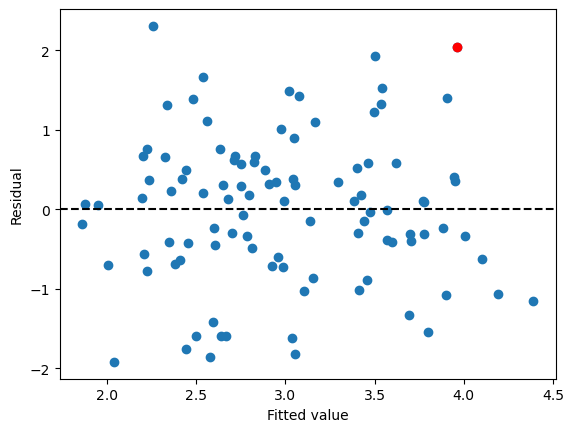

In [583]:
plt.scatter(result_c_g.fittedvalues, result_c_g.resid)
plt.xlabel('Fitted value') 
plt.ylabel('Residual')
plt.scatter(result_c_g.fittedvalues.iloc[-1], result_c_g.resid.iloc[-1], color='red')
# have color black and dashed line
plt.axhline(0, c='k', ls='--');
plt.show()

### Model d

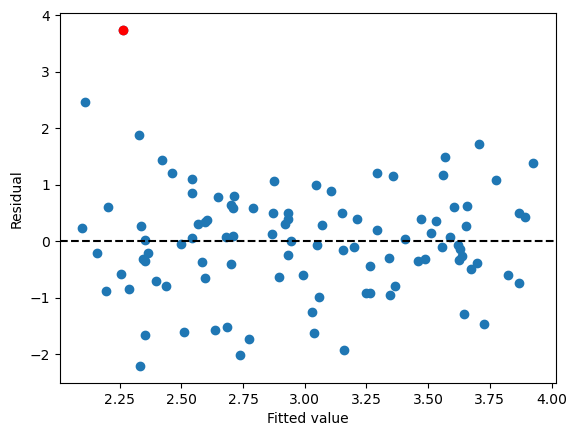

In [584]:
plt.scatter(result_d_g.fittedvalues, result_d_g.resid)
plt.xlabel('Fitted value') 
plt.ylabel('Residual')
plt.scatter(result_d_g.fittedvalues.iloc[-1], result_d_g.resid.iloc[-1], color='red')
# have color black and dashed line
plt.axhline(0, c='k', ls='--')
plt.show()

**In model d its an outlier**

### Model e

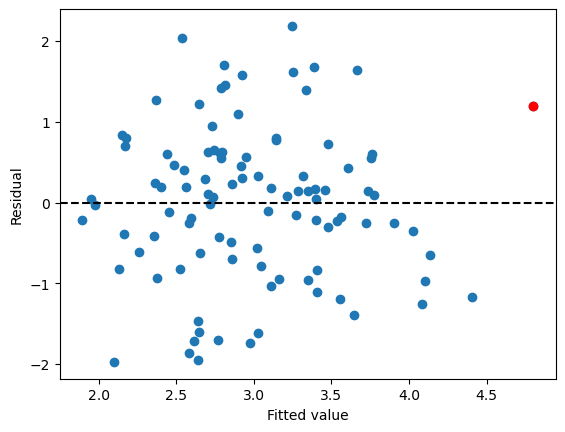

In [585]:
plt.scatter(result_e_g.fittedvalues, result_e_g.resid)
plt.xlabel('Fitted value') 
plt.ylabel('Residual')
plt.scatter(result_e_g.fittedvalues.iloc[-1], result_e_g.resid.iloc[-1], color='red')
# have color black and dashed line
plt.axhline(0, c='k', ls='--')
plt.show()

**In model e its an high leverage point**